In [1]:
import pandas as pd
from modlamp.descriptors import PeptideDescriptor, GlobalDescriptor 
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Lectura y filtrado de la base de datos

In [2]:
#Leer la base de datos (Las secuencias con aminoacidos inusuales (grampa.csv) fueron eliminados en bash)
datos_raw=pd.read_csv('grampa_AA.csv', index_col=0)
#Eliminar secuencias con modificaciones inusuales (README del repositorio de witten para más info)
datos_raw_nomod=datos_raw[datos_raw["has_unusual_modification"]==False]
#Eliminar columnas que no aportan información relevante 
datos_raw_filt=datos_raw_nomod.drop(['datasource_has_modifications','has_unusual_modification'], axis='columns')

In [8]:
datos_raw_1=pd.read_csv('grampa.csv', index_col=0)

In [9]:
len(datos_raw_1.sequence.unique())

6760

In [10]:
datos_raw_1.describe()

,value,len
count,51345.000000,51345.000000
mean,1.023112,21.898062
std,0.822811,13.590164
min,-4.684175,1.000000
25%,0.477898,13.000000
50%,1.008459,19.000000
75%,1.602060,26.000000
max,4.570309,190.000000


In [3]:
Counter(datos_raw_1.database)

Counter({'APD': 3678,
         'DADP': 819,
         'DBAASP': 34706,
         'DRAMP': 4540,
         'YADAMP': 3998})

In [12]:
datos_raw[datos_raw['url_source']=='https://dbaasp.org/peptide-card?id=2116']

,bacterium,modifications,sequence,strain,unit,url_source,value,is_modified,has_unusual_modification,has_cterminal_amidation,datasource_has_modifications,database,sequence_len
9559,E. coli,[C-Terminus: AMD],GNNRPVYIPQPRPPHPRF,D31,uM,https://dbaasp.org/peptide-card?id=2116,1.776305,True,False,True,True,DBAASP,18
9560,S. enterica,[C-Terminus: AMD],GNNRPVYIPQPRPPHPRF,G10215,uM,https://dbaasp.org/peptide-card?id=2116,0.271155,True,False,True,True,DBAASP,18
9561,K. pneumoniae,[C-Terminus: AMD],GNNRPVYIPQPRPPHPRF,K6,uM,https://dbaasp.org/peptide-card?id=2116,1.475275,True,False,True,True,DBAASP,18


In [13]:
Counter(datos_raw.unit)

Counter({'uM': 47741})

In [4]:
datos_raw.url_source.head().tolist()

['http://aps.unmc.edu/AP/database/query_output.php?ID=1958',
 'http://aps.unmc.edu/AP/database/query_output.php?ID=2119',
 'http://aps.unmc.edu/AP/database/query_output.php?ID=2119',
 'http://aps.unmc.edu/AP/database/query_output.php?ID=2119',
 'http://aps.unmc.edu/AP/database/query_output.php?ID=2119']

In [10]:
Counter(datos_raw[datos_raw['database']=='YADAMP'].url_source)

Counter({'http://www.yadamp.unisa.it/showItem.aspx?yadampid=1625': 4,
         'http://www.yadamp.unisa.it/showItem.aspx?yadampid=145': 1,
         'http://www.yadamp.unisa.it/showItem.aspx?yadampid=2420': 1,
         'http://www.yadamp.unisa.it/showItem.aspx?yadampid=168': 4,
         'http://www.yadamp.unisa.it/showItem.aspx?yadampid=405': 4,
         'http://www.yadamp.unisa.it/showItem.aspx?yadampid=1302': 3,
         'http://www.yadamp.unisa.it/showItem.aspx?yadampid=2170': 3,
         'http://www.yadamp.unisa.it/showItem.aspx?yadampid=1951': 2,
         'http://www.yadamp.unisa.it/showItem.aspx?yadampid=1956': 2,
         'http://www.yadamp.unisa.it/showItem.aspx?yadampid=373': 1,
         'http://www.yadamp.unisa.it/showItem.aspx?yadampid=1140': 2,
         'http://www.yadamp.unisa.it/showItem.aspx?yadampid=136': 4,
         'http://www.yadamp.unisa.it/showItem.aspx?yadampid=341': 5,
         'http://www.yadamp.unisa.it/showItem.aspx?yadampid=654': 2,
         'http://www.yadamp

In [9]:
Counter(datos_raw[datos_raw['database']=='DRAMP'].url_source)

Counter({'http://dramp.cpu-bioinfor.org/browse/All_Information.php?id=DRAMP01480': 2,
         'http://dramp.cpu-bioinfor.org/browse/All_Information.php?id=DRAMP01546': 3,
         'http://dramp.cpu-bioinfor.org/browse/All_Information.php?id=DRAMP04234': 2,
         'http://dramp.cpu-bioinfor.org/browse/All_Information.php?id=DRAMP02019': 2,
         'http://dramp.cpu-bioinfor.org/browse/All_Information.php?id=DRAMP04392': 2,
         'http://dramp.cpu-bioinfor.org/browse/All_Information.php?id=DRAMP02971': 2,
         'http://dramp.cpu-bioinfor.org/browse/All_Information.php?id=DRAMP04279': 9,
         'http://dramp.cpu-bioinfor.org/browse/All_Information.php?id=DRAMP01840': 2,
         'http://dramp.cpu-bioinfor.org/browse/All_Information.php?id=DRAMP02998': 10,
         'http://dramp.cpu-bioinfor.org/browse/All_Information.php?id=DRAMP02997': 10,
         'http://dramp.cpu-bioinfor.org/browse/All_Information.php?id=DRAMP03715': 6,
         'http://dramp.cpu-bioinfor.org/browse/All_I

In [7]:
Counter(datos_raw[datos_raw['database']=='APD'].url_source)

Counter({'http://aps.unmc.edu/AP/database/query_output.php?ID=1958': 1,
         'http://aps.unmc.edu/AP/database/query_output.php?ID=2119': 6,
         'http://aps.unmc.edu/AP/database/query_output.php?ID=2341': 4,
         'http://aps.unmc.edu/AP/database/query_output.php?ID=2263': 4,
         'http://aps.unmc.edu/AP/database/query_output.php?ID=1872': 4,
         'http://aps.unmc.edu/AP/database/query_output.php?ID=464': 3,
         'http://aps.unmc.edu/AP/database/query_output.php?ID=6': 12,
         'http://aps.unmc.edu/AP/database/query_output.php?ID=7': 1,
         'http://aps.unmc.edu/AP/database/query_output.php?ID=2217': 6,
         'http://aps.unmc.edu/AP/database/query_output.php?ID=782': 8,
         'http://aps.unmc.edu/AP/database/query_output.php?ID=2910': 5,
         'http://aps.unmc.edu/AP/database/query_output.php?ID=460': 3,
         'http://aps.unmc.edu/AP/database/query_output.php?ID=95': 9,
         'http://aps.unmc.edu/AP/database/query_output.php?ID=2486': 2,
  

In [8]:
Counter(datos_raw[datos_raw['database']=='DADP'].url_source)

Counter({'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_2931': 2,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_P82834': 2,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_2654': 2,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_P0C5X2': 2,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_2592': 1,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_2954': 2,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_2607': 2,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_2593': 1,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_E3SYJ3': 2,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_Q8QFQ5': 2,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_2721': 2,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_2720': 2,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_C5H0D5': 2,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_2923': 2,
         'http://split4.pmfst.hr/dadp/?a=kartica&id=SP_2695': 2,
         'http:

In [6]:
Counter(datos_raw[datos_raw['database']=='DBAASP'].url_source)

Counter({'https://dbaasp.org/peptide-card?id=4114': 7,
         'https://dbaasp.org/peptide-card?id=1322': 9,
         'https://dbaasp.org/peptide-card?id=1471': 2,
         'https://dbaasp.org/peptide-card?id=4198': 7,
         'https://dbaasp.org/peptide-card?id=8288': 5,
         'https://dbaasp.org/peptide-card?id=4977': 12,
         'https://dbaasp.org/peptide-card?id=5951': 5,
         'https://dbaasp.org/peptide-card?id=2057': 6,
         'https://dbaasp.org/peptide-card?id=492': 13,
         'https://dbaasp.org/peptide-card?id=4202': 7,
         'https://dbaasp.org/peptide-card?id=2090': 23,
         'https://dbaasp.org/peptide-card?id=8770': 4,
         'https://dbaasp.org/peptide-card?id=2930': 11,
         'https://dbaasp.org/peptide-card?id=5769': 1,
         'https://dbaasp.org/peptide-card?id=2116': 3,
         'https://dbaasp.org/peptide-card?id=2242': 7,
         'https://dbaasp.org/peptide-card?id=822': 2,
         'https://dbaasp.org/peptide-card?id=5252': 5,
        

# PepVAE

In [3]:
grampa_org=pd.read_csv('./grampa.csv', index_col=0)

In [4]:
grampa_org

,bacterium,modifications,sequence,strain,unit,url_source,value,is_modified,has_unusual_modification,has_cterminal_amidation,datasource_has_modifications,database,len
0,B. subtilis,[disulfide],GLPRKILCAIAKKKGKCKGPLKLVCKC,NaN,uM,http://aps.unmc.edu/AP/database/query_output.p...,-0.397940,True,False,False,True,APD,27
1,S. agalactiae,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,NaN,uM,http://aps.unmc.edu/AP/database/query_output.p...,-1.859819,True,False,False,True,APD,42
2,S. aureus,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,ATCC29213,uM,http://aps.unmc.edu/AP/database/query_output.p...,0.566150,True,False,False,True,APD,42
3,S. pneumonia,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,ATCC49619,uM,http://aps.unmc.edu/AP/database/query_output.p...,-1.240030,True,False,False,True,APD,42
4,S. epidermidis,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,ATCC12228,uM,http://aps.unmc.edu/AP/database/query_output.p...,0.566150,True,False,False,True,APD,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62489,C. albicans,[],LNKGAILKHIIK,NaN,uM,http://www.yadamp.unisa.it/showItem.aspx?yadam...,2.000000,False,False,False,False,YADAMP,12
62490,S. aureus,[],GCSRWIIGIHGQICRD,NaN,uM,http://www.yadamp.unisa.it/showItem.aspx?yadam...,1.491362,False,False,False,False,YADAMP,16
62491,E. coli,[],GCSRWIIGIHGQICRD,NaN,uM,http://www.yadamp.unisa.it/showItem.aspx?yadam...,2.301030,False,False,False,False,YADAMP,16
62492,B. subtilis,[],GCSRWIIGIHGQICRD,NaN,uM,http://www.yadamp.unisa.it/showItem.aspx?yadam...,0.602060,False,False,False,False,YADAMP,16


In [5]:
grampa_org=grampa_org[~grampa_org.sequence.str.contains('C')]
grampa_org=grampa_org[~grampa_org.sequence.str.contains('P')]
grampa_org_test=grampa_org[(grampa_org['len']<=40) & (grampa_org['bacterium']=='E. coli') & (grampa_org['modifications'].isin(['[C-Terminus: AMD]','[]']))]

In [7]:
sec_grampa=grampa_org_test.sequence.tolist()
sec_grampa_uniq=[]
[sec_grampa_uniq.append(x) for x in sec_grampa if x not in sec_grampa_uniq]
len(sec_grampa_uniq)

2114

## Cantidad de datos previos al filtrado

In [5]:
longitud=[]
for i in range(len(datos_raw)):
    longitud.append(len(datos_raw.sequence.iloc[i]))


In [6]:
datos_raw['len']=longitud

In [24]:
list(datos_raw.columns.values)

['bacterium',
 'modifications',
 'sequence',
 'strain',
 'unit',
 'url_source',
 'value',
 'is_modified',
 'has_cterminal_amidation',
 'database',
 'len']

In [25]:
datos_raw=datos_raw[['bacterium',
 'modifications',
 'sequence',
 'len',
 'strain',
 'unit',
 'url_source',
 'value',
 'is_modified',
 'has_cterminal_amidation',
 'database']]

In [45]:
sec_grampa=datos_raw.sequence.tolist()
sec_grampa_uniq=[]
[sec_grampa_uniq.append(x) for x in sec_grampa if x not in sec_grampa_uniq]
len(sec_grampa_uniq)

6169

### Secuencias con menos de 50 residuos

In [7]:
grampa50len=datos_raw[datos_raw['len']<=50]

In [8]:
grampa50sec=grampa50len.sequence.tolist()
sec_50len=[]
[sec_50len.append(x) for x in grampa50sec if x not in sec_50len]
len(sec_50len)

5980

In [9]:
link5 = "./Data/GRAMPA50len_sec.fasta"
ofile5 = open(link5, "w")
for i in range(len(sec_50len)):
    
    ofile5.write(">GRAMPA_" + str(i+1) + "\n" + sec_50len[i] + "\n")
    
ofile5.close()

### E. coli

In [30]:
datos_ecoli = datos_raw[datos_raw['bacterium']=='E. coli']

In [32]:
datos_ecoli.shape

(8190, 11)

In [9]:
datos_ecoli.to_csv('./Data/GRAMPA_ecoli.csv', index=True)

In [12]:
sec_ecoli=datos_ecoli.sequence.tolist()
sec_ecoli_uniq=[]
[sec_ecoli_uniq.append(x) for x in sec_ecoli if x not in sec_ecoli_uniq]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [26]:
len(sec_ecoli_uniq)

4687

In [24]:
#Secuencias E. coli en fasta

link = "./Data/GRAMPA_ecoli_sec.fasta"
ofile = open(link, "w")
for i in range(len(sec_ecoli_uniq)):
    
    ofile.write(">GRAMPA_Ecoli" + str(i+1) + "\n" + sec_ecoli_uniq[i] + "\n")
    
ofile.close()

##### secuencias menores a 50aa

In [27]:
datos_ecoli50 = datos_raw[(datos_raw['bacterium']=='E. coli') & (datos_raw['len']<=50)]

In [33]:
datos_ecoli50.to_csv('./Data/GRAMPA_ecoli50.csv', index=True)

In [34]:
sec_ecoli50=datos_ecoli50.sequence.tolist()
sec_ecoli_uniq50=[]
[sec_ecoli_uniq50.append(x) for x in sec_ecoli50 if x not in sec_ecoli_uniq50]
len(sec_ecoli_uniq50)

4561

In [35]:
#Secuencias E. coli en fasta

link4 = "./Data/GRAMPA_ecoli_sec50.fasta"
ofile4 = open(link4, "w")
for i in range(len(sec_ecoli_uniq50)):
    
    ofile4.write(">GRAMPA_Ecoli" + str(i+1) + "\n" + sec_ecoli_uniq50[i] + "\n")
    
ofile4.close()

### S. aureus

In [7]:
datos_saerus=datos_raw[datos_raw['bacterium']=='S. aureus']

In [10]:
datos_saerus.to_csv('./Data/GRAMPA_saerus.csv', index=True)

In [15]:
sec_saerus=datos_saerus.sequence.tolist()
sec_saerus_uniq=[]
[sec_saerus_uniq.append(x) for x in sec_saerus if x not in sec_saerus_uniq]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [25]:
#Secuencias S. aerus en fasta

link2 = "./Data/GRAMPA_saerus_sec.fasta"
ofile = open(link2, "w")
for i in range(len(sec_saerus_uniq)):
    
    ofile.write(">GRAMPA_Saerus" + str(i+1) + "\n" + sec_saerus_uniq[i] + "\n")
    
ofile.close()

### P. aeruginosa

In [8]:
datos_paeuri=datos_raw[datos_raw['bacterium']=='P. aeruginosa']

In [11]:
datos_paeuri.to_csv('./Data/GRAMPA_paeuri.csv', index=True)

In [20]:
sec_paeuri=datos_paeuri.sequence.tolist()
sec_paeuri_uniq=[]
[sec_paeuri_uniq.append(x) for x in sec_paeuri if x not in sec_paeuri_uniq]
len(sec_paeuri_uniq)

2565

In [23]:
#Secuencias P. aeruginosa en fasta

link3 = "./Data/GRAMPA_paeruginosa_sec.fasta"
ofile = open(link3, "w")
for i in range(len(sec_paeuri_uniq)):
    
    ofile.write(">GRAMPA_paeuri" + str(i+1) + "\n" + sec_paeuri_uniq[i] + "\n")
    
ofile.close()

In [5]:
sec_raw=datos_raw["sequence"]
#Inicia una lista vacía donde se guardarán las secuencias únicas
sec_0=[]
[sec_0.append(x) for x in sec_raw if x not in sec_0]
len(sec_0)

6169

## Filtrar por el tamaño de las secuencias

In [6]:
#Creamos una lista con las secuencias del DF para poder trabajarla en modlAMP 
sec_raw=pd.Series.tolist(datos_raw["sequence"])
#Calcular la longitud de las secuencias
globaldesc=GlobalDescriptor(sec_raw)
globaldesc.length()
lon=globaldesc.descriptor
datos_raw["sequence_length"]=lon

In [ ]:
bac_int=datos_raw["bacterium"]

Text(0.5, 1.0, 'Longitud de las secuencias')

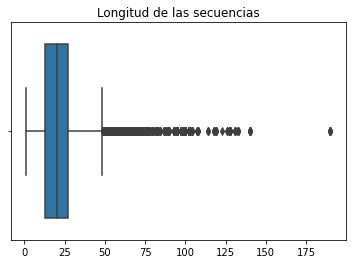

In [7]:
sns.boxplot(x=lon).set_title("Longitud de las secuencias")

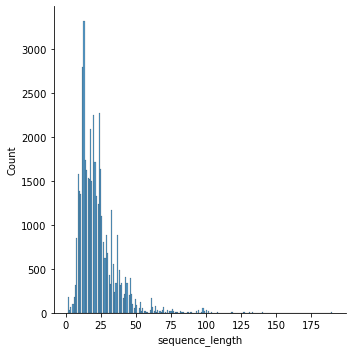

In [8]:
sns.displot(datos_raw['sequence_length'], kind='hist')

In [11]:
bac_filt=['E. coli','S. aureus','P. aeruginosa']
datos_bac=datos_raw[datos_raw["bacterium"].isin(bac_filt)].copy()

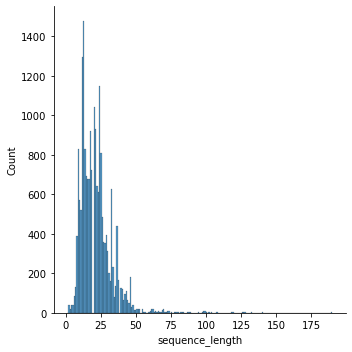

In [12]:
sns.displot(datos_bac['sequence_length'], kind='hist')

In [4]:
sec_prueba=datos_raw["sequence"]
#Inicia una lista vacía donde se guardarán las secuencias únicas
sec_1=[]
[sec_1.append(x) for x in sec_prueba if x not in sec_1]
len(sec_1)

6169

In [6]:
#Secuencias en fasta

link2 = "./Data/GRAMPA_sequences.fasta"
ofile = open(link2, "w")
for i in range(len(sec_1)):
    
    ofile.write(">GRAMPA_" + str(i+1) + "\n" + sec_1[i] + "\n")
    #ofile.write(sec_1[i] + "\n")
    
ofile.close()

FIN

In [7]:
# Conservamos secuencias de entre 10 y 50 residuos (Descubrir una forma más eficiente de hacerlo)
datos=datos_raw[(datos_raw["sequence_length"]<=50)].copy()
datos=datos[datos["sequence_length"]>=10].copy()

## Filtrar la base de datos por aparición de bacterias

In [10]:
#Creamos con Counter un diccionario con la cantidad de veces que aparece una bacteria en la base de datos
bac=Counter(datos_raw.bacterium)
#Ordenamos el diccionario por número de aparición 
#bac_dict={k: v for k, v in sorted(bac.items(), key=lambda item: item[1])} #(Eliminado porque sólo ayudó a la visualización, pero no es de utilidad para el cálculo)

#Lista vacía donde se añadirán los nombres de las bacterias que cumplan la condición
bac_fig=[]
#El loop añade a la lista creada previamente el nombre de las bacterias que aparezcan al menos 49 veces en el DataFrame 
for key, values in bac.items():
    if values >= 400:
        bac_fig.append(key)

#Filtramos la base de datos con la lista creada
bac_filt=['E. coli','S. aureus','P. aeruginosa']
datos=datos[datos["bacterium"].isin(bac_filt)].copy()

In [4]:
Counter(datos_raw.bacterium).most_common()

[('E. coli', 8190),
 ('S. aureus', 7969),
 ('P. aeruginosa', 4191),
 ('C. albicans', 2599),
 ('B. subtilis', 2104),
 ('S. epidermidis', 1183),
 ('S. typhimurium', 1053),
 ('M. luteus', 1047),
 ('K. pneumoniae', 946),
 ('E. faecalis', 905),
 ('A. baumannii', 476),
 ('B. cereus', 452),
 ('S. enterica', 407),
 ('L. monocytogenes', 389),
 ('B. megaterium', 366),
 ('E. cloacae', 329),
 ('P. syringae', 315),
 ('B. pyocyaneus', 286),
 ('E. faecium', 279),
 ('S. cerevisiae', 259),
 ('S. mutans', 259),
 ('C. neoformans', 222),
 ('S. pyogenes', 217),
 ('F. oxysporum', 192),
 ('P. mirabilis', 188),
 ('L. innocua', 181),
 ('L. lactis', 174),
 ('C. parapsilosis', 169),
 ('P. vulgaris', 166),
 ('S. marcescens', 154),
 ('X. vesicatoria', 141),
 ('C. sakazakii', 136),
 ('C. tropicalis', 133),
 ('C. glabrata', 133),
 ('H. breast', 133),
 ('B. cinerea', 126),
 ('E. amylovora', 123),
 ('S. pneumoniae', 122),
 ('H. lung', 117),
 ('S. dysenteriae', 112),
 ('A. salmonicida', 111),
 ('A. fumigatus', 108),
 (

In [12]:
ent=Counter(datos.bacterium)
ent_ord={k: v for k, v in sorted(ent.items(), key=lambda item: item[1])}
nombres=[]
frecuencia=[]
for key,values in ent_ord.items():
    nombres.append(key)
    frecuencia.append(values)

Text(0.5, 1.0, 'Valores de MIC asociados por bacteria')

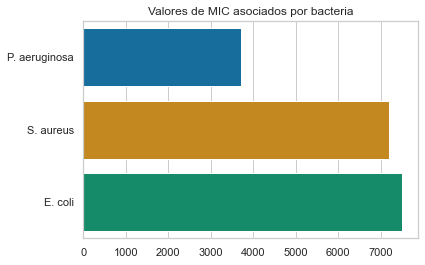

In [13]:
sns.set_theme(style="whitegrid")
sns.barplot(y=nombres,x=frecuencia,palette="colorblind").set_title("Valores de MIC asociados por bacteria")
#plt.savefig("output.png")

## Números posterior al filtrado

In [20]:
datos

,bacterium,modifications,sequence,strain,unit,value,is_modified,has_cterminal_amidation,sequence_length
2,S. aureus,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,ATCC29213,uM,0.566150,True,False,42.0
7,S. aureus,[],LVKDNPLDISPKQVQALCTDLVIRCMCCC,NaN,uM,0.491362,False,False,29.0
11,S. aureus,[],YPELQQDLIARLL,NaN,uM,0.799341,False,False,13.0
12,E. coli,[],YPELQQDLIARLL,NaN,uM,1.698970,False,False,13.0
15,S. aureus,[disulfide],GVFTLIKGATQLIGKTLGKELGKTGLELMACKITEQC,NaN,uM,0.556303,True,False,37.0
...,...,...,...,...,...,...,...,...,...
62482,S. aureus,[],KLWKLFKKIGIGAVLKVLTTGLPALKLTK,NaN,uM,0.301030,False,False,29.0
62484,S. aureus,[],INLKAITALAKKLL,NaN,uM,0.845098,False,False,14.0
62485,P. aeruginosa,[],INLKAITALAKKLL,NaN,uM,1.732394,False,False,14.0
62490,S. aureus,[],GCSRWIIGIHGQICRD,NaN,uM,1.491362,False,False,16.0


In [15]:
sec_1=datos["sequence"]
#Inicia una lista vacía donde se guardarán las secuencias únicas
sec_t=[]
[sec_t.append(x) for x in sec_1 if x not in sec_t]
len(sec_t)

4631

## Cálculo de descriptores moleculares

In [21]:
#Convertimos secuencias de Series a lista
sec=datos.sequence.tolist()
#Propensidad de formar alfa-hélices (Levitt)
helix=PeptideDescriptor(sec, 'levitt_alpha')
helix.calculate_global()
desc_helix=helix.descriptor
datos["Helix_Levitt"]=desc_helix

In [22]:
#Separamos secuencias con y sin amidación
amd=datos[datos.loc[:,"has_cterminal_amidation"]==True].copy()
no_amd=datos[datos.loc[:,"has_cterminal_amidation"]==False].copy()

In [23]:
# Secuencias con amidación

sec_amd=pd.Series.tolist(amd["sequence"])
#Peso molecular
desc_amd=GlobalDescriptor(sec_amd)
desc_amd.calculate_MW(amide=True, append=False)
mw=desc_amd.descriptor
amd["molecular_weight"]=mw

#Carga
desc_amd.calculate_charge(amide=True, append=False)
ch=desc_amd.descriptor
amd["charge"]=ch

#Aromaticidad
desc_amd.aromaticity(append=False)
ar=desc_amd.descriptor
amd["aromaticity"]=ar

#Indice alifático
desc_amd.aliphatic_index(append=False)
al=desc_amd.descriptor
amd["aliphatic_index"]=al

#Radio hidrofóbico
desc_amd.hydrophobic_ratio(append=False)
hy=desc_amd.descriptor
amd["hydrophobic_ratio"]=hy

In [24]:
# Secuencias sin amidación

sec_noamd=pd.Series.tolist(no_amd["sequence"])
#Peso molecular
desc_noamd=GlobalDescriptor(sec_noamd)
desc_noamd.calculate_MW(amide=True, append=False)
mw=desc_noamd.descriptor
no_amd["molecular_weight"]=mw

#Carga
desc_noamd.calculate_charge(amide=True, append=False)
ch=desc_noamd.descriptor
no_amd["charge"]=ch

#Aromaticidad
desc_noamd.aromaticity(append=False)
ar=desc_noamd.descriptor
no_amd["aromaticity"]=ar

#Indice alifático
desc_noamd.aliphatic_index(append=False)
al=desc_noamd.descriptor
no_amd["aliphatic_index"]=al

#Radio hidrofóbico
desc_noamd.hydrophobic_ratio(append=False)
hy=desc_noamd.descriptor
no_amd["hydrophobic_ratio"]=hy

In [25]:
#Unimos ambos DF y ordenamos por los índices para identificar con mayor facilidad

frames=[amd,no_amd]
amp_df=pd.concat(frames)
amp_df=amp_df.sort_index()

In [30]:
amp_df

,bacterium,modifications,sequence,strain,unit,value,is_modified,has_cterminal_amidation,sequence_length,Helix_Levitt,molecular_weight,charge,aromaticity,aliphatic_index,hydrophobic_ratio
2,S. aureus,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,ATCC29213,uM,0.566150,True,False,42.0,0.899762,4343.84,0.788,0.142857,25.714286,0.309524
7,S. aureus,[],LVKDNPLDISPKQVQALCTDLVIRCMCCC,NaN,uM,0.491362,False,False,29.0,1.063448,3221.94,0.659,0.000000,114.137931,0.551724
11,S. aureus,[],YPELQQDLIARLL,NaN,uM,0.799341,False,False,13.0,1.129231,1570.84,-0.003,0.076923,157.692308,0.461538
12,E. coli,[],YPELQQDLIARLL,NaN,uM,1.698970,False,False,13.0,1.129231,1570.84,-0.003,0.076923,157.692308,0.461538
15,S. aureus,[disulfide],GVFTLIKGATQLIGKTLGKELGKTGLELMACKITEQC,NaN,uM,0.556303,True,False,37.0,1.065676,3893.70,2.864,0.027027,108.108108,0.432432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62482,S. aureus,[],KLWKLFKKIGIGAVLKVLTTGLPALKLTK,NaN,uM,0.301030,False,False,29.0,1.061034,3178.05,7.994,0.068966,147.931034,0.482759
62484,S. aureus,[],INLKAITALAKKLL,NaN,uM,0.845098,False,False,14.0,1.172857,1508.94,3.995,0.000000,188.571429,0.642857
62485,P. aeruginosa,[],INLKAITALAKKLL,NaN,uM,1.732394,False,False,14.0,1.172857,1508.94,3.995,0.000000,188.571429,0.642857
62490,S. aureus,[],GCSRWIIGIHGQICRD,NaN,uM,1.491362,False,False,16.0,0.940000,1813.13,1.960,0.062500,97.500000,0.375000


In [31]:
#import os 


In [32]:
#cwd = os.getcwd()
#path = cwd + "/amps_tesis.csv"
#amp_df.to_csv(path)